# Volume Analysis 


In [2]:
# api call libraries
import requests
import json
import time

#Plotting/organizing libraries
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
plot_8hr_volume("hapeprime")

NameError: name 'plot_8hr_volume' is not defined

In [4]:
# THis function takes the slug of NFT project, and returns a list of events for that asset, based on a 20 minute time block

def get_events_for_block(slug,limit,block):
    currenttime = int(time.time())
    
    #specifiy time block using start and end 
    occurredbefore = str(currenttime - (20*60*(block-1)))
    occurredafter = str(currenttime - (20*60*block))
    
    #print(currenttime)
   #print(occurredbefore)
   # print(occurredafter)
    
    # define url
    url = "https://api.opensea.io/api/v1/events?collection_slug="+slug+"&event_type=successful&only_opensea=true&offset=0&limit="+limit+"&occurred_before="+occurredbefore+"&occurred_after="+occurredafter
    
    #define headers
    headers = {
    "Accept": "application/json",
    "X-API-KEY": "3e34c11abea1452385a6cc3349e09960"
    }
    
    #make api call
    response = requests.request("GET", url, headers=headers)
    
    #Convert to iterable list
    events = json.loads(response.text)["asset_events"]
    
    #print(len(events["asset_events"]))
    return events

In [5]:


def plot_8hr_volume(slug):
    block_event_limit = "200"
    num_blocks = 24
    
    array = np.array([0,0])
    for i in range(1,(num_blocks+1),1):
        one_block_events_list = get_events_for_block(slug,block_event_limit,i)
        array = np.vstack([array,[i,len(one_block_events_list)]])
        
    newarray = np.delete(array,[0],axis=0)
    newarray = np.flipud(newarray)
    #print(newarray)

    x = newarray[0:len(newarray),0]
    y = newarray[0:len(newarray),1]

    plt.plot(x,y)
    
    shittyplot = plt.plot(x,y)
    return shittyplot 

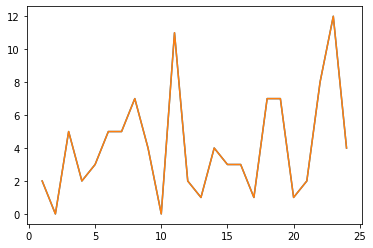

In [6]:
plot_8hr_volume("metaeagleclub-mec")


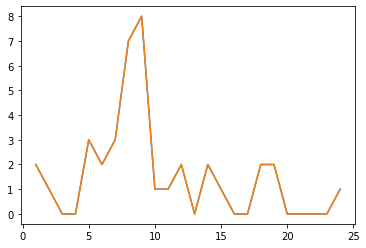

In [7]:
plot_8hr_volume("crypto-bull-society")